<a href="https://colab.research.google.com/github/arewelearningyet/DS-Unit-2-Build/blob/master/%5Beverypolitician%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS Unit 2 Predictive Modeling Build

### http://docs.everypolitician.org/

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !pip install shap
    !pip install pdpbox
    
import pandas as pd

In [66]:
# Reading in data from terms beginning Jan 3 1983 and ending Jan 3 2021

term116=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-116.csv')
term115=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-115.csv')
term114=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-114.csv')
term113=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-113.csv')
term112=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-112.csv')
term111=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-111.csv')
term110=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-110.csv')
term109=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-109.csv')
term108=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-108.csv')
term107=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-107.csv')
term106=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-106.csv')
term105=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-105.csv')
term104=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-104.csv')
term103=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-103.csv')
term102=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-102.csv')
term101=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-101.csv')
term100=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-100.csv')
term99=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-99.csv')
term98=pd.read_csv('https://cdn.rawgit.com/everypolitician/everypolitician-data/35c09ba19b40bfd272953719e0b22126d76c589e/data/United_States_of_America/House/term-98.csv')


In [76]:
# Concatenating single-term dataframes into a single dataframe

df=pd.concat([term98, term99, term100, term101, term102, term103, term104, term105,
           term106, term107, term108, term109, term110, term111, term112,
           term113, term114, term115, term116
], ignore_index=True)

In [68]:
# Preview features
df.head()

,id,name,sort_name,email,twitter,facebook,group,group_id,area_id,area,chamber,term,start_date,end_date,image,gender,wikidata,wikidata_group,wikidata_area
0,02059c1e-0bdf-4813-9135-260fd4b72237,"Abraham Kazen, Jr.","Kazen, Abraham",NaN,NaN,NaN,Democrat,democrat,TX-23,Texas's 23rd congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q330149,Q29552,Q7707374
1,c79ba260-2b97-4bf8-a24d-87b484feb8b6,Alan Mollohan,"Mollohan, Alan",NaN,NaN,NaN,Democrat,democrat,WV-1,West Virginia's 1st congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q1234572,Q29552,Q7986804
2,8a9230a8-46a1-4faf-947c-5e5d57f96f26,Alan Wheat,"Wheat, Alan",NaN,NaN,NaN,Democrat,democrat,MO-5,Missouri's 5th congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q548596,Q29552,Q6879455
3,741bb69a-43e5-4273-9c21-1b152b305946,"Albert Gore, Jr.","Gore, Albert",NaN,algore,algore,Democrat,democrat,TN-6,Tennessee's 6th congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q19673,Q29552,Q7699994
4,d082b0d2-3b8b-47bd-80ae-772c2decdcdc,Alfred McCandless,"McCandless, Alfred",NaN,NaN,NaN,Republican,republican,CA-37,California's 37th congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q371675,Q29468,Q5020049


In [77]:
# drop redundant features, high cardinality features
# begin with smaller set; retain term, area, group, and gender

df=df.drop(columns=['email', 'chamber','image', 'wikidata', 'facebook', 'twitter', 'name', 'sort_name', 'wikidata_group', 'wikidata_area', 'start_date', 'end_date', 'area_id', 'group_id'])

In [7]:
# check shape
df.shape

(8493, 4)

In [9]:
df.describe(exclude='number')

,group,area,gender
count,8493,8493,8493
unique,8,486,2
top,Democrat,Hawaii's 1st congressional district,male
freq,4452,22,7350


In [10]:
# explore gender as target
df['gender'].value_counts()

male      7350
female    1143
Name: gender, dtype: int64

In [11]:
# determine majority class

df.gender.value_counts(normalize=True)

male      0.865419
female    0.134581
Name: gender, dtype: float64

In [81]:
# change gender column into boolean column for 'is rep female'

df['gender']=df['gender']=='female'
df.gender.head()

0    False
1    False
2    False
3    False
4    False
Name: gender, dtype: bool

In [102]:
# confirm creation

df.head()

,id,group,area,term,female
0,02059c1e-0bdf-4813-9135-260fd4b72237,Democrat,Texas's 23rd congressional district,98,False
1,c79ba260-2b97-4bf8-a24d-87b484feb8b6,Democrat,West Virginia's 1st congressional district,98,False
2,8a9230a8-46a1-4faf-947c-5e5d57f96f26,Democrat,Missouri's 5th congressional district,98,False
3,741bb69a-43e5-4273-9c21-1b152b305946,Democrat,Tennessee's 6th congressional district,98,False
4,d082b0d2-3b8b-47bd-80ae-772c2decdcdc,Republican,California's 37th congressional district,98,False


In [82]:
# rename column for accuracy

df.rename(columns={'gender':'female'}, inplace=True)
df.head()

,id,group,area,term,female
0,02059c1e-0bdf-4813-9135-260fd4b72237,Democrat,Texas's 23rd congressional district,98,False
1,c79ba260-2b97-4bf8-a24d-87b484feb8b6,Democrat,West Virginia's 1st congressional district,98,False
2,8a9230a8-46a1-4faf-947c-5e5d57f96f26,Democrat,Missouri's 5th congressional district,98,False
3,741bb69a-43e5-4273-9c21-1b152b305946,Democrat,Tennessee's 6th congressional district,98,False
4,d082b0d2-3b8b-47bd-80ae-772c2decdcdc,Republican,California's 37th congressional district,98,False


In [15]:
# reaffirm majority class baseline of modified feature
df.female.value_counts(normalize=True)

False    0.865419
True     0.134581
Name: female, dtype: float64

In [18]:
# define the majority class
majorityclass=df.female.mode()[0]
# run a preliminary prediction based on majority class
pred=[majorityclass]*len(df)
# import accuracy metric function
from sklearn.metrics import accuracy_score
# measure accuracy of preliminary prediction based on majority class
accuracy_score(df.female, pred)

0.8654185800070646

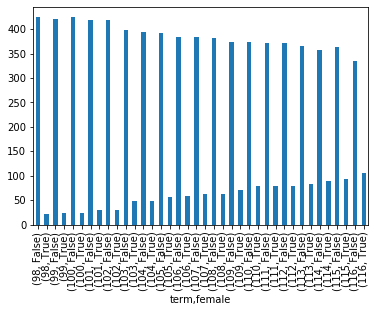

In [19]:
# look at trend of representation by gender over time/terms

byterm=df.groupby('term')['female'].value_counts()
byterm.plot.bar(x='term', y='female');

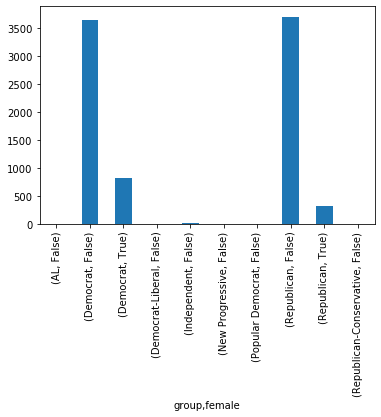

In [20]:
# Examine gender by group

bygroup=df.groupby('group')['female'].value_counts()
bygroup.plot.bar(x='group', y='female');

In [106]:
# create a dataframe of all female representatives
females=df[df['female']==True]
females.shape

(1143, 5)

In [112]:
# doublechecking that there are only GOP/dem female reps in this period
females.group.nunique()

2

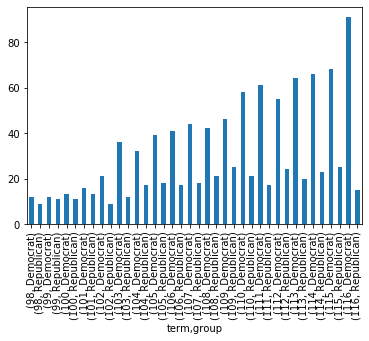

In [109]:
# grouping subset of female reps by term per group to
# cabs    compare growth of representation of females in either party 

termgroup=females.groupby('term')['group'].value_counts()
termgroup.plot.bar(x='term', y='group');

In [111]:
# examining relative parity of fem representation between parties in 80s

termgroup.head(10)

term  group     
98    Democrat      12
      Republican     9
99    Democrat      12
      Republican    11
100   Democrat      13
      Republican    11
101   Democrat      16
      Republican    13
102   Democrat      21
      Republican     9
Name: group, dtype: int64

In [83]:
# apply train/test split
from sklearn.model_selection import train_test_split
train, test=train_test_split(df, train_size=0.8,random_state=42)
train.shape, test.shape

((6794, 5), (1699, 5))

In [84]:
key=test[['id', 'female']]
key.head()

,id,female
8219,01bc21bf-8939-4875-8b24-184d6c23a8bc,False
4977,19315ae9-0b4a-4535-b583-a7adef58396a,False
1535,4ad713f1-ec7b-46ce-88c4-98bd0c10f5c5,False
5046,75bd366a-824e-4159-9fc4-2339a10a8831,False
7445,0239032f-be5c-4afd-8543-f0199745014f,False


In [87]:
train, val=train_test_split(train, train_size=0.8, random_state=42)
train.shape, val.shape

((5435, 5), (1359, 5))

In [88]:
# arrange data into features matrix and target vector
# features=[]
target='female'
features=df.columns.drop(['female', 'id'])
xtrain=train.drop(columns=['female', 'id'])
ytrain=train[target]
xval=val.drop(columns=['female', 'id'])
yval=val[target]
xtest=test.drop(columns=['female', 'id'])
ytest=test[target]

In [24]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

encoder=ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(xtrain)
X_val_encoded = encoder.transform(xval)
X_test_encoded= encoder.transform(xtest)
# imputer=SimpleImputer(strategy='median')
# X_train_processed= imputer.fit_transform(X_train_encoded)
# X_val_processed=imputer.transform(X_val_encoded)
# X_test_processed=imputer.transform(X_test_encoded)

eval_set = [(X_train_encoded, ytrain), 
            (X_val_encoded, yval)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_encoded, ytrain, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.690777	validation_1-auc:0.732236
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.701396	validation_1-auc:0.729112
[2]	validation_0-auc:0.700303	validation_1-auc:0.72981
[3]	validation_0-auc:0.715964	validation_1-auc:0.735661
[4]	validation_0-auc:0.721183	validation_1-auc:0.741203
[5]	validation_0-auc:0.721166	validation_1-auc:0.739233
[6]	validation_0-auc:0.723388	validation_1-auc:0.739427
[7]	validation_0-auc:0.730245	validation_1-auc:0.744317
[8]	validation_0-auc:0.730286	validation_1-auc:0.74496
[9]	validation_0-auc:0.730361	validation_1-auc:0.745022
[10]	validation_0-auc:0.735584	validation_1-auc:0.748337
[11]	validation_0-auc:0.738802	validation_1-auc:0.74686
[12]	validation_0-auc:0.73884	validation_1-auc:0.743705
[13]	validation_0-auc:0.740408	validation_1-auc:0.746238
[14]	validation_0-auc:0.740871	validation_1-auc:0.744819
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
from sklearn.metrics import roc_auc_score
# X_test_encoded = encoder.transform(xtest)
class_index = 1
y_pred_proba = model.predict_proba(X_test_encoded)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(ytest, y_pred_proba)) # Ranges from 0-1, higher is better

Test ROC AUC for class 1:
0.7174900419948453


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


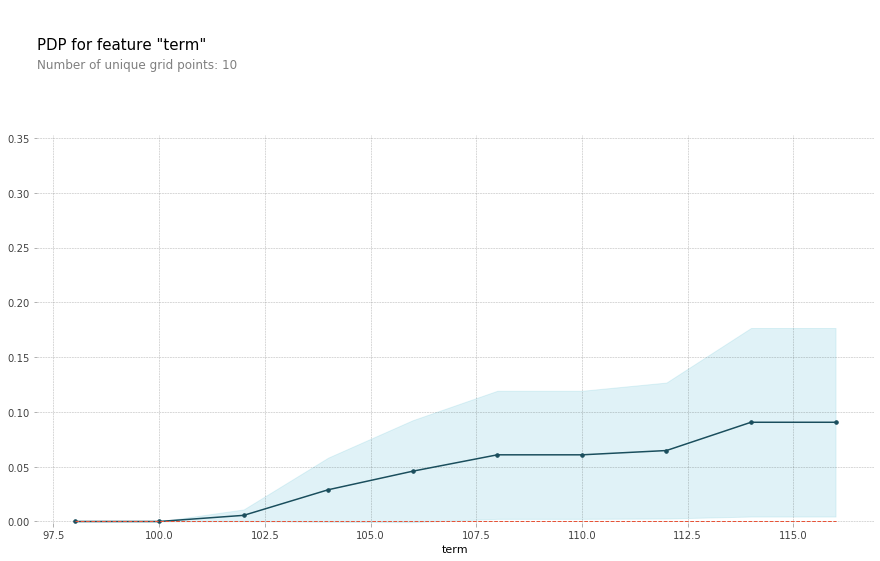

In [26]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'term'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

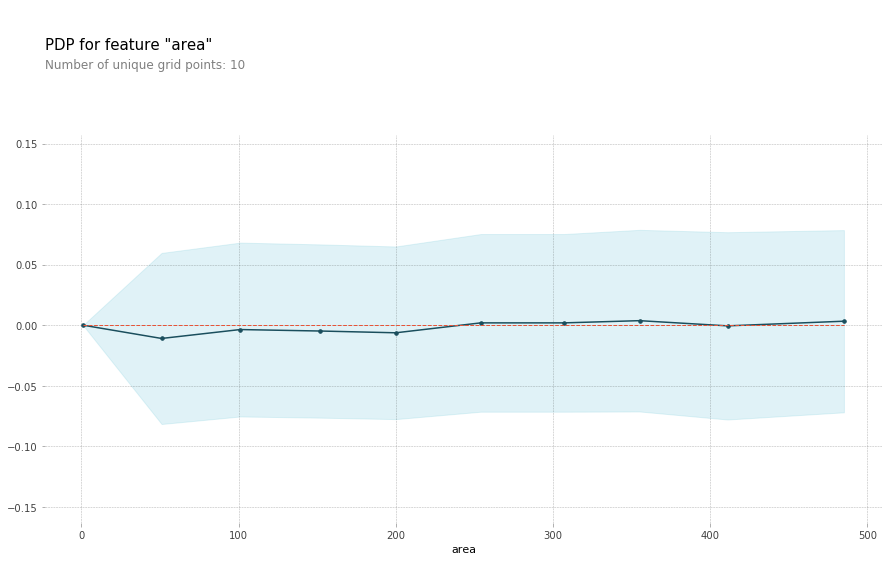

In [27]:
feature = 'area'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

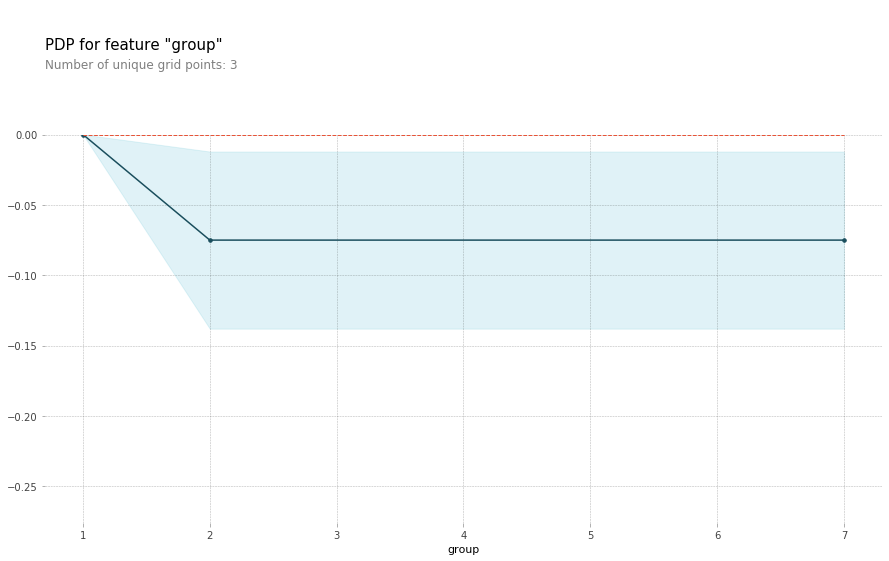

In [28]:
feature = 'group'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(xtrain, ytrain)
ypred = gb.predict(xval)
print('Gradient Boosting R^2', r2_score(yval, ypred))

Gradient Boosting R^2 0.2549141834458325


In [30]:
ytest.head(20)

8219    False
4977    False
1535    False
5046    False
7445    False
5587    False
3792    False
7318    False
4999    False
3661    False
1665    False
730     False
7601    False
4304    False
3898    False
8211    False
6932     True
4161    False
7676    False
3593    False
Name: female, dtype: bool

In [31]:
xtest.head(20)

,group,area,term
8219,Republican,Oregon's 2nd congressional district,116
4977,Democrat,Minnesota's 7th congressional district,109
1535,Democrat,Indiana's 5th congressional district,101
5046,Democrat,New York's 5th congressional district,109
7445,Democrat,Massachusetts's 7th congressional district,114
5587,Democrat,Colorado's 3rd congressional district,110
3792,Democrat,Massachusetts's 6th congressional district,106
7318,Democrat,New York's 8th congressional district,114
4999,Democrat,Oregon's 1st congressional district,109
3661,Republican,Indiana's 2nd congressional district,106


In [32]:
row=xtest.iloc[[2]]
row

,group,area,term
1535,Democrat,Indiana's 5th congressional district,101


In [33]:
import shap

rowindex=2
row=xtest.iloc[[rowindex]]
print(row)
print(ytest.iloc[[rowindex]])

explainer=shap.TreeExplainer(model)
row_processed=encoder.transform(row)
shap_values=explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row,
    link='logit' # for classificaiton, shows predicted probabilities
)

         group                                  area  term
1535  Democrat  Indiana's 5th congressional district   101
1535    False
Name: female, dtype: bool


In [34]:
rowindex=3
row=xtest.iloc[[rowindex]]
print(row)
print(ytest.iloc[[rowindex]])

explainer=shap.TreeExplainer(model)
row_processed=encoder.transform(row)
shap_values=explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row,
    link='logit' 
)

         group                                   area  term
5046  Democrat  New York's 5th congressional district   109
5046    False
Name: female, dtype: bool


In [35]:
rowindex=16
row=xtest.iloc[[rowindex]]
print(row)
print(ytest.iloc[[rowindex]])

explainer=shap.TreeExplainer(model)
row_processed=encoder.transform(row)
shap_values=explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row,
    link='logit' 
)

         group                               area  term
6932  Democrat  Ohio's 3rd congressional district   113
6932    True
Name: female, dtype: bool


In [36]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

pipeline=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=0, n_jobs=-1,
                           min_samples_leaf=50)
)
scores = cross_val_score(pipeline, xtrain, ytrain, cv=3, n_jobs=-1,
                         fit_params=None) 
print(scores)


[0.86368653 0.86368653 0.86416345]


In [37]:
pipeline.fit(xtrain, ytrain)
print('Validation Accuracy: ', pipeline.score(xval, yval))

Validation Accuracy:  0.869757174392936


In [38]:
# transformers = make_pipeline(
#     ce.OrdinalEncoder(), 
#     SimpleImputer(strategy='median')
# )

# X_train_transformed = transformers.fit_transform(xtrain)
# X_val_transformed = transformers.transform(xval)

# model.fit(X_train_transformed, ytrain)

In [39]:
model = pipeline.named_steps['randomforestclassifier']
# model.feature_importances_ #linear models have coeff, but trees have 'feat imports'
encoder= pipeline.named_steps['ordinalencoder']
encoded_cols = encoder.transform(xval).columns
importances = pd.Series(model.feature_importances_, encoded_cols)

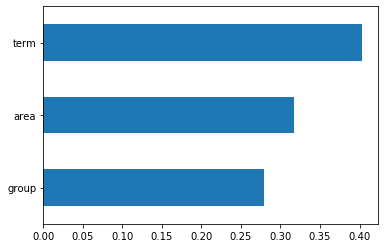

In [40]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(?,?))
importances.sort_values().plot.barh();

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_encoded, ytrain)
print('Validation Accuracy', log_reg.score(X_val_encoded, yval))

Validation Accuracy 0.8690213392200147


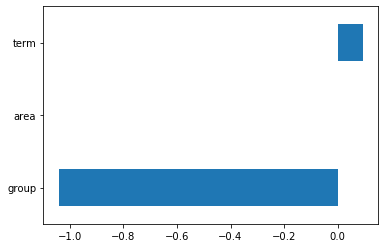

In [43]:
coefficients=pd.Series(log_reg.coef_[0], xtrain.columns)
coefficients.sort_values().plot.barh();

In [44]:
X_test_encoded=encoder.transform(xtest)
print(f'Test Accuracy: {log_reg.score(X_test_encoded, ytest)}')

Test Accuracy: 0.8669805768098882


In [45]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


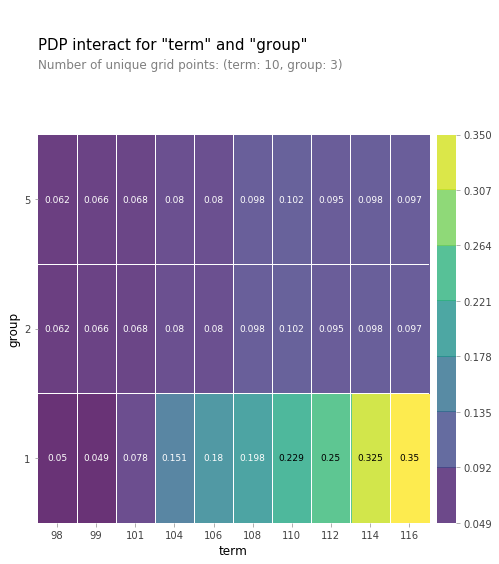

In [46]:
features = ['term', 'group']

interaction = pdp_interact(
    model=model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [47]:
train.head()

,group,area,term,female
505,Democrat,New York's 16th congressional district,99,False
1870,Republican,Colorado's 6th congressional district,102,False
1270,Democrat,California's 5th congressional district,100,True
6604,Democrat,Pennsylvania's 1st congressional district,112,False
1988,Democrat-Liberal,New York's 8th congressional district,102,False


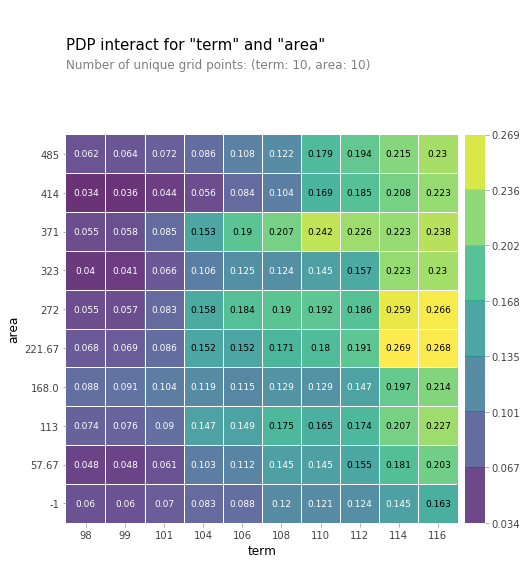

In [48]:
features = ['term', 'area']

interaction = pdp_interact(
    model=model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [49]:
train['area'].nunique()

485

In [50]:
from sklearn.ensemble import RandomForestClassifier
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(xtrain)
X_val_transformed = transformers.transform(xval)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [51]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_encoded, yval)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [52]:
feature_names = xval.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

term    -0.008241
area     0.012215
group    0.016336
dtype: float64

In [53]:
eli5.show_weights(
    permuter, 
    top=None, # show all 
    feature_names=feature_names # must be a list
)

Weight,Feature
0.0163 ± 0.0082,group
0.0122 ± 0.0140,area
-0.0082 ± 0.0110,term


In [89]:
y_pred=pipeline.predict(xtest)

In [90]:
y_pred

array([False, False, False, ..., False, False, False])

In [91]:
guess=key.copy()
guess['female']=y_pred
guess.head()

,id,female
8219,01bc21bf-8939-4875-8b24-184d6c23a8bc,False
4977,19315ae9-0b4a-4535-b583-a7adef58396a,False
1535,4ad713f1-ec7b-46ce-88c4-98bd0c10f5c5,False
5046,75bd366a-824e-4159-9fc4-2339a10a8831,False
7445,0239032f-be5c-4afd-8543-f0199745014f,False


In [105]:
guess['female_guess']=guess['female']
guess=guess.drop(columns='female')
guess.head()
#guess.to_csv('guess', index=False)

,id,female_guess
8219,01bc21bf-8939-4875-8b24-184d6c23a8bc,False
4977,19315ae9-0b4a-4535-b583-a7adef58396a,False
1535,4ad713f1-ec7b-46ce-88c4-98bd0c10f5c5,False
5046,75bd366a-824e-4159-9fc4-2339a10a8831,False
7445,0239032f-be5c-4afd-8543-f0199745014f,False


In [95]:
df.area.unique()

array(["Texas's 23rd congressional district",
       "West Virginia's 1st congressional district",
       "Missouri's 5th congressional district",
       "Tennessee's 6th congressional district",
       "California's 37th congressional district",
       "Washington's 2nd congressional district",
       "Indiana's 10th congressional district",
       "Florida's 10th congressional district",
       "California's 23rd congressional district",
       "California's 15th congressional district",
       "Guam's at-large congressional district",
       "Minnesota's 7th congressional district",
       "Pennsylvania's 22nd congressional district",
       "Puerto Rico's at-large congressional district",
       "Maryland's 3rd congressional district",
       "California's 6th congressional district",
       "Connecticut's 1st congressional district",
       "Nevada's 2nd congressional district",
       "New York's 30th congressional district",
       "Massachusetts's 4th congressional district",
 

In [96]:
df.group.unique()

array(['Democrat', 'Republican', 'New Progressive', 'Independent',
       'Democrat-Liberal', 'Republican-Conservative', 'AL',
       'Popular Democrat'], dtype=object)

In [97]:
example= pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')
example.head()

,Country Name,Indicator Name,Year,Value
0,Arab World,"Agriculture, value added (% of GDP)",1962,NaN
1,Arab World,CO2 emissions (metric tons per capita),1962,0.760996
2,Arab World,Domestic credit provided by financial sector (...,1962,18.168690
3,Arab World,Electric power consumption (kWh per capita),1962,NaN
4,Arab World,Energy use (kg of oil equivalent per capita),1962,NaN


In [98]:
example.shape

(36960, 4)

In [100]:
u2b = pd.read_csv('https://github.com/arewelearningyet/DS-Unit-2-Build/blob/master/df?raw=true')

In [101]:
u2b.head()

,id,name,sort_name,email,twitter,facebook,group,group_id,area_id,area,chamber,term,start_date,end_date,image,gender,wikidata,wikidata_group,wikidata_area
0,02059c1e-0bdf-4813-9135-260fd4b72237,"Abraham Kazen, Jr.","Kazen, Abraham",NaN,NaN,NaN,Democrat,democrat,TX-23,Texas's 23rd congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q330149,Q29552,Q7707374
1,c79ba260-2b97-4bf8-a24d-87b484feb8b6,Alan Mollohan,"Mollohan, Alan",NaN,NaN,NaN,Democrat,democrat,WV-1,West Virginia's 1st congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q1234572,Q29552,Q7986804
2,8a9230a8-46a1-4faf-947c-5e5d57f96f26,Alan Wheat,"Wheat, Alan",NaN,NaN,NaN,Democrat,democrat,MO-5,Missouri's 5th congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q548596,Q29552,Q6879455
3,741bb69a-43e5-4273-9c21-1b152b305946,"Albert Gore, Jr.","Gore, Albert",NaN,algore,algore,Democrat,democrat,TN-6,Tennessee's 6th congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q19673,Q29552,Q7699994
4,d082b0d2-3b8b-47bd-80ae-772c2decdcdc,Alfred McCandless,"McCandless, Alfred",NaN,NaN,NaN,Republican,republican,CA-37,California's 37th congressional district,House of Representatives,98,NaN,NaN,https://theunitedstates.io/images/congress/ori...,male,Q371675,Q29468,Q5020049


In [103]:
df.head()

,id,group,area,term,female
0,02059c1e-0bdf-4813-9135-260fd4b72237,Democrat,Texas's 23rd congressional district,98,False
1,c79ba260-2b97-4bf8-a24d-87b484feb8b6,Democrat,West Virginia's 1st congressional district,98,False
2,8a9230a8-46a1-4faf-947c-5e5d57f96f26,Democrat,Missouri's 5th congressional district,98,False
3,741bb69a-43e5-4273-9c21-1b152b305946,Democrat,Tennessee's 6th congressional district,98,False
4,d082b0d2-3b8b-47bd-80ae-772c2decdcdc,Republican,California's 37th congressional district,98,False
